In [1]:
import pickle
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.stem import porter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
true_df = pickle.load(open("pickle_files/true_df.pkl", "rb" ))
true_df_backup = pickle.load(open("pickle_files/true_df_backup.pkl", "rb" ))

In [3]:
true_df.source.value_counts()

Info wars          515
Reuters            495
Mother Jones       455
Activist Post      420
National Review    418
Huffington Post    412
Alabama Today      385
Daily Beast        347
Breitbart          307
Global Research    190
Fox News           121
Associate Press     27
Name: source, dtype: int64

In [3]:
stemmer = porter.PorterStemmer()
stopwords = stopwords.words()

In [32]:
def clean_text(text):
    '''Removes stop words and changes word to stem words'''
    cleaned_text = []
    for post in text:
        cleaned_words = []
        for word in post.split():
            low_word = stemmer.stem(word.lower())
            if low_word not in stopwords:
                cleaned_words.append(low_word)
        cleaned_text.append(' '.join(cleaned_words))
    return cleaned_text

In [33]:
cleaned_text = clean_text(true_df.body)

In [34]:
with open('cleaned_text.pkl', 'wb') as picklefile:
        pickle.dump(cleaned_text, picklefile)

In [20]:
clean_text = pickle.load(open("pickle_files/clean_text.pkl", "rb" ))


'clean_text = pickle.load(open("pickle_files/clean_text.pkl", "rb" ))'

In [16]:
no_stem_text = pickle.load(open("pickle_files/no_stem_text.pkl", "rb" ))


In [21]:
os.system('say "This job is as done as we are with Sarah Sander\'s stupid lies."')

0

In [397]:
len(cleaned_text)

4092

In [546]:
test = [
"russian kiril thursday say russian stay war-torn indefinitely russian told hi would soon “ go home victorious ” signific withdrawing far troop appear leav they stay long ’ so said annual direct live we build long-term need could fairli quickli withdraw without need there carri sphere. toward 2015 lend syrian al-assad mire civil iranian back coordin stay updat roundup best must-read ’ annual call-in russian showcas everyday although ’ ’ behind social however show everyon happy “ our live worse it ’ onli ” one user wrote elect anoth six-year earlier 76 '' '' '' '' \\/\\/www.nationalreview.com\\/wp-json\\/wp\\/v2\\/slideshow\\/474154 '' '' attributes '' '' '' '' '' '' '' attributes '' '' about '' '' '' '' '' attributes '' '' '' '' '' '' '' attributes '' '' '' '' '' '' '' attributes '' '' '' '' '' embeddable '' true '' '' '' '' attributes '' '' '' '' '' embeddable '' true '' '' '' '' attributes '' '' '' '' '' embeddable '' true '' '' '' '' '' '' '' get '' true '' '' false '' '' false '' '' true '' '' '' '' '' uniqu '' '' '' '' '' '' '' '' made determin present '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' embed '' '' '' '' '' '' '' '' '' '' '' protected '' '' '' string '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' 2018-03-03t21:40:13 '' '' '' '' 2018-03-04t02:40:13 '' '' '' '' '' \\/\\/fresh-mig-nr-2017.pantheonsite.io\\/ '' '' modified '' '' 2018-03-07t13:46:07 '' '' '' '' 2018-03-07t18:46:07 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' \\/\\/www.nationalreview.com\\/photos\\/russian-troops-syria\\/ '' '' '' '' '' russian '' '' '' '' '' russian '' '' protected '' false '' '' '' '' '' '' '' '' 6066 '' '' '' '' '' '' '' '' '' '' '' '' '' u=https 3a 2f 2fphotos 2frussian-troops-syria 2f '' '' '' '' '' '' '' '' '' url=https 3a 2f 2fphotos 2frussian-troops-syria 2f text=russian '' '' '' '' '' '' '' '' '' body=russian \\/\\/www.nationalreview.com\\/photos\\/russian-troops-syria\\/ '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' russian govern syrian bashar al-assad elsewher multi-facet war-torn continues here\\u2019 russian eastern ghouta near oper past '' '' '' '' '' '' '' large '' '' \\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-00.jpg 2c576 '' '' '' '' \\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-00.jpg 2c90 '' '' '' '' '' '' '' '' '' syrian russian near wafideen 2 2018 '' '' '' '' '' '' large '' '' \\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-15.jpg 2c576 '' '' '' '' \\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-15.jpg 2c90 '' '' '' '' '' '' '' '' '' a russian near russian wafideen 2 2018 '' '' '' '' '' '' large '' '' \\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-11.jpg 2c576 '' '' '' '' \\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-11.jpg 2c90 '' '' '' '' '' '' '' '' '' russian wafideen 1 2018 '' '' '' '' '' '' large '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-10.jpg 2c576 '' '' '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-10.jpg 2c90 '' '' '' '' '' '' '' '' '' a russian wafideen 1 2018 '' '' '' '' '' '' large '' '' \\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-9.jpg 2c576 '' '' '' '' \\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-9.jpg 2c90 '' '' '' '' '' '' '' '' '' syrian russian 2 2018 '' '' '' '' '' '' large '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-14.jpg 2c576 '' '' '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-14.jpg 2c90 '' '' '' '' '' '' '' '' '' russian near wafideen 2 2018 '' '' '' '' '' '' large '' '' \\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-12.jpg 2c576 '' '' '' '' \\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-12.jpg 2c90 '' '' '' '' '' '' '' '' '' russian near wafideen 2 2018 '' '' '' '' '' '' large '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-13.jpg 2c576 '' '' '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-13.jpg 2c90 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' large '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-5.jpg 2c576 '' '' '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-5.jpg 2c90 '' '' '' '' '' '' '' '' '' a russian wafideen 1 2018 '' '' '' '' '' '' large '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-8.jpg 2c576 '' '' '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-8.jpg 2c90 '' '' '' '' '' '' '' '' '' a russian wafideen 1 2018 '' '' '' '' '' '' large '' '' \\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-7.jpg 2c576 '' '' '' '' \\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-7.jpg 2c90 '' '' '' '' '' '' '' '' '' russian syrian wafideen februari 28 2018 '' '' '' '' '' '' large '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-6.jpg 2c576 '' '' '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-6.jpg 2c90 '' '' '' '' '' '' '' '' '' russian syrian wafideen februari 28 2018 '' '' '' '' '' '' large '' '' \\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-3.jpg 2c576 '' '' '' '' \\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-3.jpg 2c90 '' '' '' '' '' '' '' '' '' russian syrian red crescent near wafideen 5 2018 '' '' '' '' '' '' large '' '' \\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-2.jpg 2c576 '' '' '' '' \\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-2.jpg 2c90 '' '' '' '' '' '' '' '' '' russian syrian red crescent near wafideen 5 2018 '' '' '' '' '' '' large '' '' \\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-1.jpg 2c576 '' '' '' '' \\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russian-troops-syria-photos-1.jpg 2c90 '' '' '' '' '' russian februari 2 2017 omar '' '' '' '' here earlier russian pictured russian februari 2 2017 omar '' '' '' '' '' '' '' large '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-18-1.jpg 2c537 '' '' '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-18-1.jpg 2c90 '' '' '' '' '' russian sever bashar al-assad fight civil sinc 2011. pictured russian february omar '' '' '' '' russian february omar '' '' '' '' '' '' '' large '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-15-1.jpg 2c537 '' '' '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-15-1.jpg 2c90 '' '' '' '' '' russian februari 2 2017 ali '' '' '' '' russian februari 2 2017 ali '' '' '' '' '' '' '' large '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-17-1.jpg 2c537 '' '' '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-17-1.jpg 2c90 '' '' '' '' '' russian februari 2 2017 ali '' '' '' '' russian februari 2 2017 ali '' '' '' '' '' '' '' large '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-14-1.jpg 2c537 '' '' '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-14-1.jpg 2c90 '' '' '' '' '' russian februari 2 2017 omar '' '' '' '' russian februari 2 2017 omar '' '' '' '' '' '' '' large '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-16-1.jpg 2c537 '' '' '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-16-1.jpg 2c90 '' '' '' '' '' russian 18 2017 omar '' '' '' '' russian 18 2017 omar '' '' '' '' '' '' '' large '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-21-1.jpg 2c537 '' '' '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-21-1.jpg 2c90 '' '' '' '' '' stand near russian at wa syrian 18 2017 omar '' '' '' '' stand near russian at wa syrian 18 2017 omar '' '' '' '' '' '' '' large '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-20-1.jpg 2c537 '' '' '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-20-1.jpg 2c90 '' '' '' '' '' a russian stand hous 4 2016 omar '' '' '' '' a russian stand hous 4 2016 omar '' '' '' '' '' '' '' large '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-7-1.jpg 2c537 '' '' '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-7-1.jpg 2c90 '' '' '' '' '' a russian vehicl hanono hous 4 2016 omar '' '' '' '' a russian vehicl hanono hous 4 2016 omar '' '' '' '' '' '' '' large '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-9-1.jpg 2c537 '' '' '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-9-1.jpg 2c90 '' '' '' '' '' a russian near came back inspect hous 4 2016 omar '' '' '' '' a russian near came back inspect hous 4 2016 omar '' '' '' '' '' '' '' large '' '' \\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-8-1.jpg 2c537 '' '' '' '' \\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-8-1.jpg 2c90 '' '' '' '' '' russian near militari 30 2017 ali '' '' '' '' russian near militari 30 2017 ali '' '' '' '' '' '' '' large '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-30-1.jpg 2c537 '' '' '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-30-1.jpg 2c90 '' '' '' '' '' russian near vehicl 4 2016 omar '' '' '' '' russian near vehicl 4 2016 omar '' '' '' '' '' '' '' large '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-31-1.jpg 2c537 '' '' '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-31-1.jpg 2c90 '' '' '' '' '' a russian 4 2016 omar '' '' '' '' a russian 4 2016 omar '' '' '' '' '' '' '' large '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-5-1.jpg 2c537 '' '' '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-5-1.jpg 2c90 '' '' '' '' '' russian 4 2016 omar '' '' '' '' russian 4 2016 omar '' '' '' '' '' '' '' large '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-6-1.jpg 2c537 '' '' '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-6-1.jpg 2c90 '' '' '' '' '' russian old 31 2017 ali '' '' '' '' russian old 31 2017 ali '' '' '' '' '' '' '' large '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-12-1.jpg 2c537 '' '' '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-12-1.jpg 2c90 '' '' '' '' '' russian old 31 2017 ali '' '' '' '' russian old 31 2017 ali '' '' '' '' '' '' '' large '' '' \\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-13-1.jpg 2c537 '' '' '' '' \\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-13-1.jpg 2c90 '' '' '' '' '' russian civilian along 30 2017 ali '' '' '' '' russian civilian along 30 2017 ali '' '' '' '' '' '' '' large '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-19-1.jpg 2c537 '' '' '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-19-1.jpg 2c90 '' '' '' '' '' a russian inspect russian russian said syrian 5 2016 sana\\/handout via '' '' '' '' a russian inspect russian russian said syrian 5 2016 sana\\/handout via '' '' '' '' '' '' '' large '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-10-1.jpg 2c537 '' '' '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-10-1.jpg 2c90 '' '' '' '' '' inspect wreckag russian shot north rebel-held august 1 2016 ammar '' '' '' '' inspect wreckag russian shot north rebel-held august 1 2016 ammar '' '' '' '' '' '' '' large '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-2-1.jpg 2c537 '' '' '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-2-1.jpg 2c90 '' '' '' '' '' russian near syrian eastern aleppo jibreen novemb 30 2016. show syrian russian read 8220 omar '' '' '' '' russian near syrian eastern aleppo jibreen novemb 30 2016. show syrian russian read arabic '' omar '' '' '' '' '' '' '' large '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-4-1.jpg 2c537 '' '' '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-4-1.jpg 2c90 '' '' '' '' '' a russian 4 omar '' '' '' '' a russian 4 omar '' '' '' '' '' '' '' large '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-1-1.jpg 2c537 '' '' '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-1-1.jpg 2c90 '' '' '' '' '' a russian 4 2017 omar '' '' '' '' a russian 4 2017 omar '' '' '' '' '' '' '' large '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-29-1.jpg 2c537 '' '' '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-29-1.jpg 2c90 '' '' '' '' '' russian 18 2016 vadim defens ministry\\/via '' '' '' '' russian 18 2016 vadim defens ministry\\/via '' '' '' '' '' '' '' large '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-11-1.jpg 2c537 '' '' '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-11-1.jpg 2c90 '' '' '' '' '' a sukhoi su-24 take near octob 2015 ministri russian '' '' '' '' a sukhoi su-24 take near octob 2015 ministri russian '' '' '' '' '' '' '' large '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-3-1.jpg 2c537 '' '' '' '' \\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2017\\/04\\/russians-syria-photos-3-1.jpg 2c90 '' '' '' '' '' \\/\\/www.nationalreview.com\\/photos\\/russian-troops-syria\\/ '' '' slideshowarchive '' '' '' '' '' '' '' \\/\\/www.nationalreview.com\\/photos\\/william-f-buckley-national-review-founder-remembrance\\/ '' '' '' '' '' '' '' '' '' '' \\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2016\\/02\\/wfb-replace-1-1.jpg 2c150 '' '' '' '' '' '' '' '' '' around '' '' '' '' next '' '' '' '' '' '' '' '' '' '' 122825 '' '' '' '' nr '' '' '' '' '' '' '' '' '' '' user_nicename '' '' '' '' '' '' \\/\\/www.nationalreview.com\\/author\\/nr-staff\\/ '' '' '' '' '' '' '' false '' '' false '' '' false '' '' '' '' false '' '' false '' '' '' '' false '' '' '' '' '' '' '' '' '' '' \\/\\/www.nationalreview.com\\/photos\\/russian-troops-syria\\/ '' '' type=text\\/html '' '' '' mairead onlin graduat lit harvard speech",
 "suzann “ natur ” meme big — even propos insert u.s. left cal amend current bring increas ” “ invari whether would grant unborn human right maintain regener vital ” — languag nature-right would receiv enforc ” '' '' '' '' “ what think ” alway repli rhetorically now articl ” constitut hit veri cal 2.0 termin abil renew itself perpetuity. ” could interpret ban cal says—so it right unborn expect logic consist nature-right bake agenda flour spoon anti-human leaven return-icon wesley j. senior fellow human"
]

In [556]:
def drop_nouns(text_list):
    no_nouns = []
    cleaned_text = []
    all_nouns = ['NN' or 'NNS' or 'NNP' or 'NNPS']
    for x in text_list:
        words = pos_tag(word_tokenize(x))
        #werdz2 = (['CC','CD','DT','EX','FW','IN','LS','MD','PDT','POS','PRP','PRP$',
                   #'RP','TO','UH','WDT','WP','WP$','WRB', 'NNP', 'NNPS', 'NN', 'NNS', ',', '.', ':', '(', ')'])
        werdz3 = ['NNP', 'NN', 'NNP', 'NNPs', 'NNS', ',', '.', ':', '(', ')', '#', '``']
        werdz = [s for s in words if s[-1] not in werdz3]
        #print(werdz)
        say_no = ['@','[', ']', 'amp', 'window', 'open','click', 'googletag', 'gpt', 'linkitem', 'googletag', 'getelementbyid',
        'config', 'ldadinit', 'advertis', 'typeof', 'adsdiv', 'fjs', 'js', 'http', 'com', 'awr', 'new', 'function', 'div',
        'ad', 'script', 'typeof', 'nr_is_logged_in', 'undefined', 'adsdiv', 'sharebox_260x60', 'ifr', 'jwplayer', 'jwp',
        'pubdate', 'adunit', 'adwidth', 'www', 'bit.ly/2jpexyr', 'googletag.cmd.push', 'googletag.display', '\'div-gpt-ad-1415299254516-0 \'',
        'open', 'opening', 'opens', 'opened', 'alabama', 'loading', 'email', 'advertise', 'apps', 'closed', 'help', 'publish',
        'rendered', 'undefined', 'adsdiv', 'reloadcount', 'adsdiv.reloadcount', 'window.orignetid', '\'undefined', 'window.origadsplid', 'needsrecovery',
        'io_c3sd.ads', 'elem', 'box', 'box.offsetheight', 'box.style.marginright', 'marginright', 'ad_sharebox_260x60', 'trump',
        'russia', 'fox', 'alerts', 'facebook', 'reuters', 'rsize', 'i+= resize /scr+ipt', 'ipt', 'scr', 'script', 'window.adsetsynccalled',
        'adsetsynccalled', 'recoveryid', 'enablequeue', 'slotrenderended', 'beast', 'daily beast', 'clicking', 'subscribed', 'korea', 'north korea', 'south korea',
        'breitbart', 'epa', 'labelmapping', 'comey', 'scotus', 'republicans', 'cohen', 'iran', 'syria', 'eagles', 'april', 'colorado', 'fbi',
        'haspel', 'wedding', 'puerto', 'rico', 'puerto rico', 'huffpost', 'donald', 'don', 'nra', 'sachs', 'kelly', 'facebook', 'mohammed',
        'div-gpt-ad-1415299254516-0 ', '\'div-gpt-ad-1415299254516-0 \'', '\'slotrenderended \'', 'slotrenderended', 
        '\'.single-post # div-gpt-ad-1415299254516-0 \'', 'slotrenderended', 'ldadinit', 'roseanne', 'israel', 'gaza', 
        'china', 'beijing', 'samantha', 'bee', 'valierie', 'subscribe', 'prelimmonth', 'ivanka', 'documentcloud', 'melania', 
        '(', ')', '-', ',', '.', '!', '"', '\'', 'var', "\'div-gpt-ad-1415299254516-0", 'div-gpt-ad-1415299254516-0', '\'.single-post'
        '\'slotrenderended', 'funct', '.contents', 'googletag.pubads', "\'slotrenderended", "\'.single-post", "'div-gpt-ad-1403197269028-0"
        , 'line-height', '>', 'adtech-adspot', '//', '/style', 'overrid', 'window.adsetplid', 'adid', '||', 'adtech_call_typ',
        'by_request', 'adtech_call_typ', 'iframe_proxy', 'ifr.offsetwidth', "ifr.offsetheight", "'jquery", "'readytorecover",
        'args', "waitforglobal", 'arg', "elem.contains", "'reloadad", 'els', "'adtech", 'refreshr', "'none", 'collapsed', 
        'fc', 'f', 'ajax', 'needsrecoveri', 'i+=', '&', '<', '=', 'http', 'https', "'http", "'http", "'script", 'twitter', 
        '/.test', "'https", 'newsletter-inline-widget', 'margin-bottom', '15px', 'font-weight', 'font-size', '12pt', 'div.mc-field-group',
        'padding-bottom', 'padding-right', 'input.mc-input', '.newsletter-inline-widget', 'font-family', '.wpcf7-form-control.wpcf7-text',
        '7e7e7e', 'arial', '.wpcf7', '.wpcf7-form-control.wpcf7-text', '.newsletter.widget__contain', '.wpcf7-form-control.wpcf7-submit',
        'box-shadow', 'text-shadow', 'letter-spacing', '.newsletter.widget__wrap', '.newsletter.widget__head', 'text-transform', 
        'max-width', 'td.first', 'padding-left', 'border-radius', 'hr.divid', 'p.subtext','==typeof', '.gettime', 'window.outerwidth',
        'rcel.async', '/**', 'url', "'data-timestamp", '+new', 'd.head', 'javascript', 'php_widget-140', 'php_widget-104', '.today-on-the-show-cont',
        '.alignleft', 'margin-right', 'margin-top', '.alignright', "'/wp-content/uploads/static/tots.html", "'.today-on-the-show-content",
        "'.today-on-the-show-cont", '.html', 'img.hero-ad-speci', 'fa', 'fa-chevron-down', 'usercollapsetext', 'newsletter-side-widget', 
        'ul.stansberry-form', 'text-align', 'margin-left:0', 'margin-bottom:5px', 'border-top', '-webkit-border-radius', '-khtml-border-radius',
        'border-width', 'border-style', 'border-right', 'padding-left:8px', '.textsiz', 'margin-top:5px', 'ul.links_list', 'img.breaking_imag', 
        'adtech_sharebox_260x60', 'advertisement', '===', 'kraken__adblock.active', 'i=0', 'id=', 'style=', '//www.documentcloud.org/documents/4434037-hhrg-115-if00-wstate-zuckerbergm-20180411.js', 
        '//assets.documentcloud.org/documents/4434037/hhrg-115-if00-wstate-zuckerbergm-20180411.pdf', 'br', 'lt', '//assets.documentcloud.org/documents/4434037/hhrg-115-if00-wstate-zuckerbergm-20180411.txt',
        '//www.documentcloud.org/documents/4425618-van-der-zwaan.js', '//assets.documentcloud.org/documents/4425618/van-der-zwaan.pdf', '//assets.documentcloud.org/documents/4425618/van-der-zwaan.txt',
        'subscrib', 'window.datawrapper', '.embeddeltas', 'datawrapper-height', '=typeof', '==', 'div-gpt-ad-inline_1_mobile', '.jw-player-contain', "'jwp",
        '.playlist', 'episode.title', 'ns_st_st=\\', 'ns_st_pu=\\', 'ns_st_pr=\\', 'ns_st_ep=\\', 'ns_st_ia=\\', 'div-gpt-ad-native_mobile', 'div-gpt-ad-inline_2_mobile',
        'div-gpt-ad-inline_3_mobile', 'ns_st_sn=\\', 'ns_st_en=\\', 'ns_st_ge=\\', 'ns_st_ce=\\', 'ns_st_ddt=\\', 'ns_st_tdt=\\', 'div-gpt-ad-native', 'div-gpt-ad-inline_4_mobile',
        '\\/\\/www.nationalreview.com\\/wp-json\\/wp\\/v2\\/slideshow\\/596990', '\\u0000*\\u0000links', '\\/\\/www.nationalreview.com\\/wp-json\\/wp\\/v2\\/media', '\\/\\/www.nationalreview.com\\/wp-json\\/wp\\/v2\\/categories',
        '\\/\\/api.w.org\\/term', '\\/\\/www.nationalreview.com\\/wp-json\\/wp\\/v2\\/tags', '\\/\\/www.nationalreview.com\\/photos\\/prince-harry-meghan-markle-royal-wedding\\/', '2fwww.nationalreview.com', 'text=harri', '2fprince-harry-meghan-markle-royal-wedding',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-26.jpg', '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-8.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-37.jpg', '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-110.jpg',
        '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-111.jpg', '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-45.jpg',
        '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-38.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-44.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-7.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-12.jpg', 
        '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-11.jpg', '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-43.jpg', 
        '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-21.jpg', '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-18.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-22.jpg', '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-116.jpg',
        '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-42.jpg', '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-14.jpg',
        '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-39.jpg', '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-54.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-112.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-106.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-25.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-46.jpg',
        '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-24.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-29.jpg',
        '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-48.jpg', '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-107.jpg',
        '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-47.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-33.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-51.jpg', 'google_ad_cli', 
        'adunit.style.display', '.length', 'google_ad_width', 'google_ad_height', 'adunit.style.margin', 'adunit.style.textalign', 'adunit.classnam',
        '//www.activistpost.com/2018/06/israeli-selling-surveillance-systems-governments-around-world.html', "'theactivistpost", '.innerhtml', 'ld-ajs', 'w.ldadinit=w.ldadinit||', '//www.activistpost.com/2018/06/google-quits-drone-program-u-s-navy-wants-drone-motherships-with-help-of-a-i.html',
        '302px', '422px', '300px', '0px', '12px', '60px', '25px', '250px', '3px', '40px', '1px', '10px','titl', '0\\', '//www.activistpost.com/2018/04/us-bombs-syria-to-cover-up-lack-of-evidence-on-chem-attacks-discredits-own-claims-by-doing-so.html', 
        '//www.activistpost.com/2018/05/red-nose-day-recognizes-kids-living-in-poverty-article-the-rich-get-smart-the-poor-get-technology-the-new-digital-divide-in-school-choice-highlights-part-of-the-problem.html', 
        'firstscript', 'dsqlocal', "'trackback_url", 'disqus_shortnam', 'fb-extra-h2', 'prelimd', 'resize', 'scr+ipt', 'paul', 'watson']
        werdz = [s[-2] for s in werdz if s[-2] not in say_no]
       
        #check cleaned text line from function above
        no_nouns.append(' '.join(werdz))
        #no_nouns.append(werdz)
    return no_nouns

In [557]:
how_can_this_happen = drop_nouns(cleaned_text)

In [552]:
testing

[[('say', 'VBP'),
  ('indefinitely', 'RB'),
  ('would', 'MD'),
  ('soon', 'RB'),
  ('“', 'VB'),
  ('go', 'VB'),
  ('home', 'RB'),
  ('withdrawing', 'VBG'),
  ('far', 'RB'),
  ('appear', 'VBP'),
  ('leav', 'IN'),
  ('they', 'PRP'),
  ('stay', 'VBP'),
  ('long', 'RB'),
  ('so', 'RB'),
  ('said', 'VBD'),
  ('we', 'PRP'),
  ('build', 'VBP'),
  ('could', 'MD'),
  ('fairli', 'VB'),
  ('without', 'IN'),
  ('there', 'EX'),
  ('carri', 'VB'),
  ('sphere', 'RB'),
  ('toward', 'IN'),
  ('2015', 'CD'),
  ('back', 'RB'),
  ('best', 'JJS'),
  ('although', 'IN'),
  ('behind', 'IN'),
  ('however', 'RB'),
  ('show', 'VBP'),
  ('“', 'FW'),
  ('our', 'PRP$'),
  ('it', 'PRP'),
  ('’', 'VBZ'),
  ('one', 'CD'),
  ('wrote', 'VBD'),
  ('anoth', 'DT'),
  ('earlier', 'JJR'),
  ('76', 'CD'),
  ('attributes', 'VBZ'),
  ('attributes', 'VBZ'),
  ('about', 'IN'),
  ('attributes', 'VBZ'),
  ('attributes', 'VBZ'),
  ('attributes', 'VBZ'),
  ('attributes', 'VBZ'),
  ('attributes', 'VBZ'),
  ('get', 'VB'),
  ('made', 'V

In [545]:
how_can_this_happen[2001:4000]

['michael associ septemb 2014.susan walsh free michael teenag whose polic unrest 2014 major black live said monday run made announc discuss polic violenc we get behind peopl like us get elect realli what ’ right i ’ go start said “ what would be—elect supervis wa repres famili unarm 22-year-old kill march ’ backyard “ what would be—elect supervis michael brown. black council polic predomin white brown killed 2015 first municip follow brown elect two black candid bring total black six-memb three sinc son mcspadden high wrote clinton 2016 would first rel black recent high-profile race-ting so luci mother 17-year-old wa florida 2012 white upset wa announc earlier run u.s. hous home told mother stand statehous higher-profil hous high',
 'r-ariz. look free hous hear rep. r-ariz. suggest unaccompani reach like warn asylum fixed countri “ be confront anoth gener daca-lik two-hour build recent nearli 1,500 migrant mexico us border organ “ oper under humanitarian mcsally refer increas flee seek

In [558]:
with open('how_can_this_happen.pkl', 'wb') as picklefile:
        pickle.dump(how_can_this_happen, picklefile)

In [33]:
'''text_w_no_nouns = pickle.load(open("pickle_files/text_w_no_nouns.pkl", "rb" ))'''

'text_w_no_nouns = pickle.load(open("pickle_files/text_w_no_nouns.pkl", "rb" ))'

In [34]:
os.system('say "Your move.....Commander"')

0

Without join: 134 µs ± 2.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

With join: 289 µs ± 22.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

In [ ]:
os.system('say "your move Commander"')

In [51]:
with open('corpus.pkl', 'wb') as picklefile:
        pickle.dump(corpus, picklefile)

In [3]:
'''cleaned_text = pickle.load(open("pickle_files/clean_text.pkl", "rb" ))'''

In [4]:
corpus = pickle.load(open("pickle_files/corpus.pkl", "rb" ))

In [5]:
count_vectorizer2 = CountVectorizer(ngram_range=(1, 4),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)

X = count_vectorizer2.fit_transform(corpus)

In [ ]:
n_topics = 50
n_iter = 10
lda = LatentDirichletAllocation(n_topics=n_topics,
                                max_iter=n_iter,
                                random_state=42,
                               learning_method='online')
X_centered_projected = lda.fit_transform(X)

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [ ]:
def display_topics(model, feature_names, no_top_words):
    '''Creates a list of words in each topics'''
    for ix, topic in enumerate(model.components_):
        print("Topic ", ix+1)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
display_topics(lda,count_vectorizer2.get_feature_names(),20)

In [119]:
SSEs = []
Sil_coefs = []
for k in range(2,21):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_centered_projected)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(X_centered_projected, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 

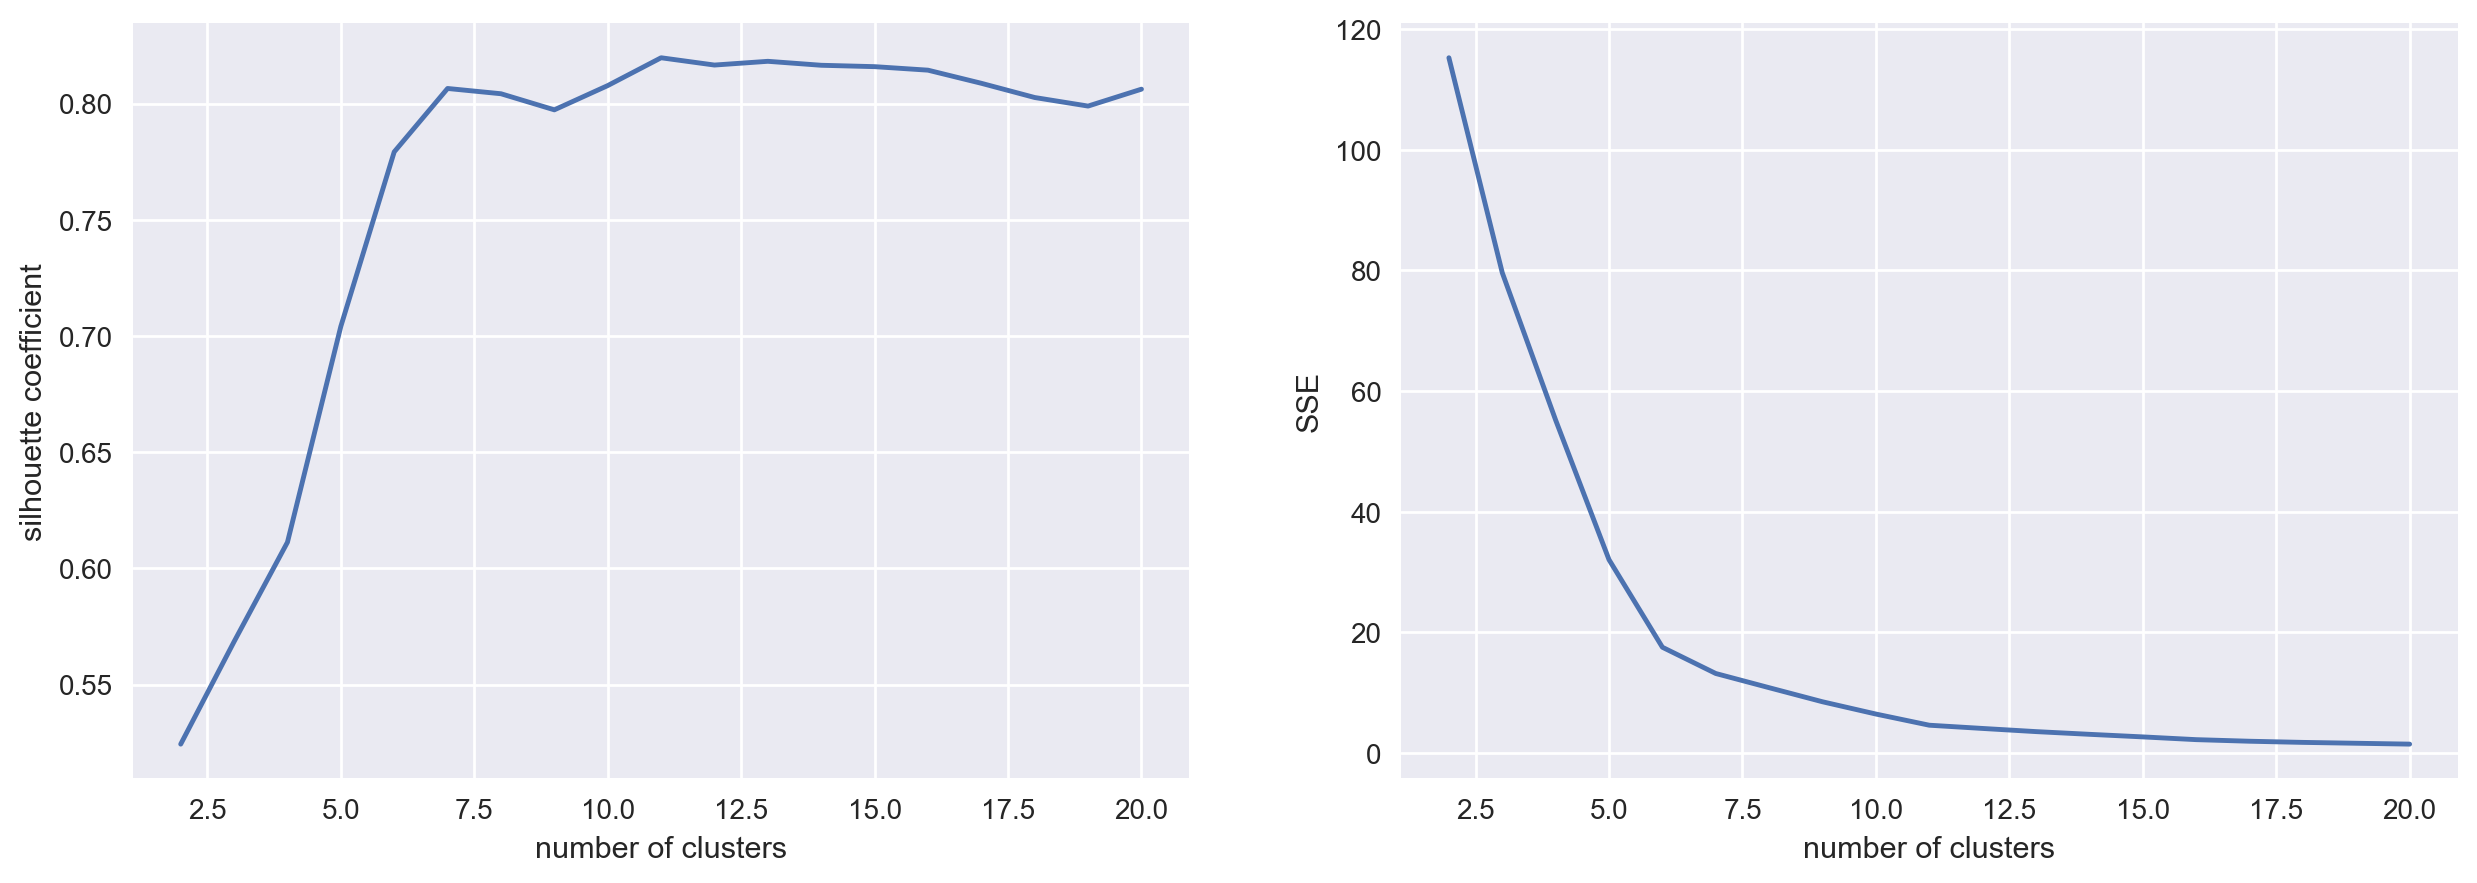

In [120]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,21)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [68]:
km = KMeans(n_clusters=20)
clusts = km.fit_predict(X_centered_projected)

In [71]:
centers = km.cluster_centers_
centers

array([[9.45032045e-07, 9.45032062e-07, 2.62917196e-01, 9.45032046e-07,
        1.59432678e-04, 9.45032045e-07, 9.45032045e-07, 9.45032045e-07,
        3.44113765e-03, 9.45032045e-07, 9.45032045e-07, 9.45032045e-07,
        9.45032045e-07, 9.45032045e-07, 9.45032045e-07, 9.45032045e-07,
        9.45032045e-07, 9.45032063e-07, 4.20935104e-03, 7.29258707e-01],
       [5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02,
        5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02,
        5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02,
        5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02,
        5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02],
       [1.26875080e-05, 1.26875081e-05, 1.26875081e-05, 1.26875080e-05,
        1.26875081e-05, 1.26875080e-05, 1.26875080e-05, 1.26875080e-05,
        9.98790780e-01, 1.26875080e-05, 1.26875080e-05, 1.26875080e-05,
        1.26875080e-05, 1.26875080e-05, 1.26875080e-05, 1.2687

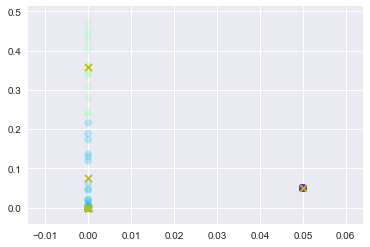

In [72]:
plt.scatter(X_centered_projected[:, 0], X_centered_projected[:, 1], c=clusts, cmap=plt.cm.rainbow, alpha=0.25)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='y')
#plt.xlim(-.5,1.5)
#plt.ylim(1.5,4.5)

In [121]:
os.system('say "your move Commander"')

0